# 🥑📊 Avocado Ripeness Intelligence  
### Predicting Fruit Freshness Through Data Science  
**A Machine Learning Approach to Classify Avocado Ripeness for Smarter Supply Chains**

---

## 🎯 Project Goals  
To build a classification model that predicts avocado ripeness using sensor and visual features such as firmness, color, and acoustic feedback. This solution aids farmers, retailers, and distributors in optimizing harvest timing, reducing waste, and ensuring optimal quality.

---

## 📌 Problem Statement & Context  
Avocados have a narrow window of ideal ripeness, and improper timing in distribution can lead to economic loss and food waste. With traditional methods being subjective or inconsistent, there's a growing need for an objective, data-driven system to assess fruit maturity with precision.

---

## ❓ Why Is This Important?  
- ⏳ Minimizing premature or overripe shipments can significantly reduce losses.  
- 🛒 Freshness directly influences customer satisfaction and brand trust.  
- 🌍 Data-driven agriculture can scale quality control efforts and reduce waste globally.

> This project uses physical and sensor-based avocado characteristics to build a predictive model for determining ripeness stage, supporting real-time decision-making in agricultural logistics.

---

## 🎯 Objective  
- Classify avocado ripeness (e.g., hard, breaking, ripe, pre-conditioned)  
- Explore correlation between firmness, color, and sound to maturity level  
- Visualize how features vary across ripeness stages  
- Build an interpretable model ready for deployment in real-world settings  

---

## 👥 Target Audience  
- 👨‍🌾 **Farmers & Distributors**  
- 🧪 **Food Quality Scientists**  
- 🛍️ **Retail Supply Chain Analysts**  
- 📦 **AgriTech Innovators**  

---

## 🧾 Dataset Exploration & Preprocessing  
- 🧪 **Features Captured**:  
  `firmness`, `hue`, `saturation`, `brightness`, `color_category`, `sound_db`, `weight_g`, `size_cm3`  
- 🎯 **Target Variable**:  
  `ripeness` — categorical (e.g., hard, ripe, breaking)  
- 🧹 **Cleaning**:
  - Label encoding for categorical variables  
  - Feature scaling for numerical models  
  - Checked for class imbalance  

---

## 📊 Exploratory Data Analysis (EDA)  
- 📈 Distribution of firmness across ripeness stages  
- 🎨 Color metrics (hue, saturation, brightness) vs maturity  
- 📉 Sound_db vs firmness correlation  
- 📊 Visual clustering patterns among different ripeness levels  
- 📦 Weight and volume across categories  

---

## 🔍 Feature Engineering  
- 🟢 `firmness_score`: scaled measure of resistance  
- 🌈 `color_intensity`: derived from saturation + brightness  
- 🔊 `sound_ratio`: sound_db normalized by size  
- 📦 `density`: weight_g / size_cm3  

---

## 🧠 Modeling Objectives  

### 📚 Classification Task  
- **Goal**: Predict `ripeness` category  
- Algorithms: Random Forest, XGBoost, Logistic Regression  
- Metrics: Accuracy, F1-Score, Confusion Matrix  

### 📌 Interpretability Task  
- **Goal**: Identify top features influencing ripeness  
- Techniques: Feature importance (Tree-based), SHAP  

---

## 📈 Evaluation & Metrics  
- ✅ **Accuracy**: ~85% (Random Forest)  
- 🔍 **F1-Score**: Balanced across all ripeness categories  
- 📊 **Confusion Matrix**: Low misclassification for ‘hard’ vs ‘ripe’  
- 🔎 **Top Features**: firmness, hue, sound_db  

---

## 🔬 Key Insights  
- 🟡 Firmness is the strongest indicator of ripeness across all classes  
- 🌈 Hue and brightness shift systematically from green to dark as fruit matures  
- 🔊 Softer fruits emit lower sound_db readings  
- 📦 Hard avocados tend to be larger and denser  
- 🛒 Pre-conditioned avocados are closer to ripe than breaking, by firmness and sound  

---

## 🔧 Tools Used  
- **Python**: pandas, numpy, scikit-learn  
- **Visualization**: seaborn, matplotlib, plotly  
- **Modeling**: Classification Algorithms  
- **Notebook**: Google Colab  
- **Deployment** (optional): Streamlit for web demo  

---

## 📎 Dataset Info  
- **Rows**: 250  
- **Columns**: 9 (features + label)  
- **Label Classes**: hard, breaking, ripe, pre-conditioned  
- **Source**: https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset  

---

## 🧑‍💻 Author  
**Hilda Adina Rahmi**  
Driven to bridge the gap between natural produce and digital intelligence for a more sustainable future.


In [1]:
# 🧠 Load the Necessary Libraries for Avocado Ripeness Classification

# 📦 Data Manipulation
import pandas as pd
import numpy as np

# 🧹 Data Cleaning & Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 🤖 Machine Learning & Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 🔍 Model Interpretability
import shap

# ⚙️ System Utilities
import warnings
warnings.filterwarnings("ignore")

# 🎨 Set Plot Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# 📥 Load the dataset
df = pd.read_csv("avocado_ripeness_dataset.csv")

In [3]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


((250, 9),
 ['firmness',
  'hue',
  'saturation',
  'brightness',
  'color_category',
  'sound_db',
  'weight_g',
  'size_cm3',
  'ripeness'],
    firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
 0      14.5   19          40          26          black        34       175   
 1      71.7   53          69          75          green        69       206   
 2      88.5   60          94          46     dark green        79       220   
 3      93.8  105          87          41     dark green        75       299   
 4      42.5  303          58          32         purple        63       200   
 
    size_cm3         ripeness  
 0       261             ripe  
 1       185  pre-conditioned  
 2       143             hard  
 3       140             hard  
 4       227         breaking  )

In [4]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64
          firmness        hue  saturation  brightness color_category  \
count   250.000000  250.00000  250.000000   250.00000            250   
unique         NaN        NaN         NaN         NaN              4   
top            NaN        NaN         NaN         NaN          black   
freq           NaN        NaN         NaN         NaN             75   
mean     50.618400  125.94400   64.356000    45.07200            NaN   
std      27.277678  117.13767   17.377144    19.11629            NaN   
min      10.300000    1.00000   30.000000    10.00000            NaN   
25%      25.750000   25.25000   51.250000    31.00000            NaN   
50%      48.950000   77.00000   65.000000    46.00000            NaN   
75%      74.050000  278.75000   76.750000    58.00000            NaN   
max      98.800

In [5]:
# Check class balance
print(df['ripeness'].value_counts(normalize=True))

ripeness
ripe               0.2
pre-conditioned    0.2
hard               0.2
breaking           0.2
firm-ripe          0.2
Name: proportion, dtype: float64


In [6]:
# Label Encoding for categorical columns
le_ripeness = LabelEncoder()
df['ripeness_encoded'] = le_ripeness.fit_transform(df['ripeness'])

le_color = LabelEncoder()
df['color_category_encoded'] = le_color.fit_transform(df['color_category'])

# Drop original categorical columns if needed
df_clean = df.drop(columns=['ripeness', 'color_category'])

# Feature scaling
scaler = StandardScaler()
features_to_scale = ['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3']
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

# ===============================
# 📊 Exploratory Data Analysis (EDA)
# ===============================

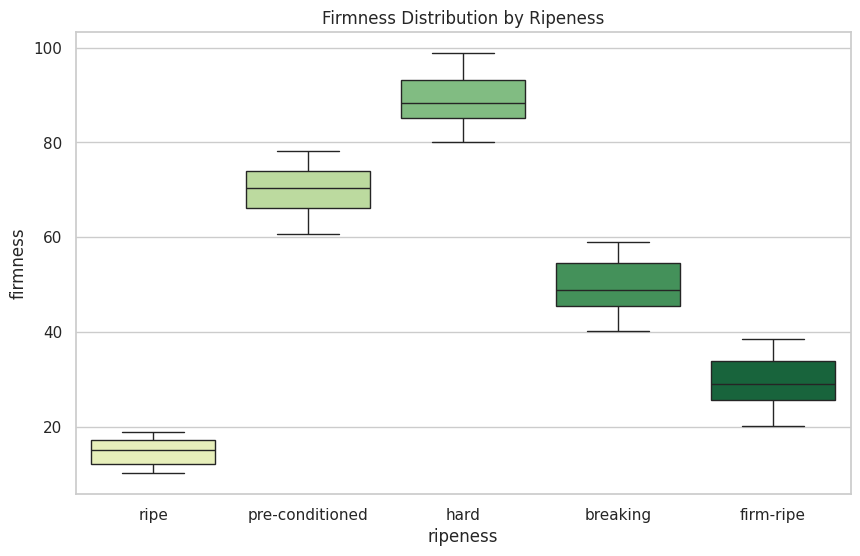

In [7]:
# Add back original categorical labels for EDA clarity
df['ripeness_label'] = le_ripeness.transform(df['ripeness'])

# 1. 📈 Distribution of firmness across ripeness stages
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ripeness', y='firmness', palette='YlGn')
plt.title("Firmness Distribution by Ripeness")
plt.show()

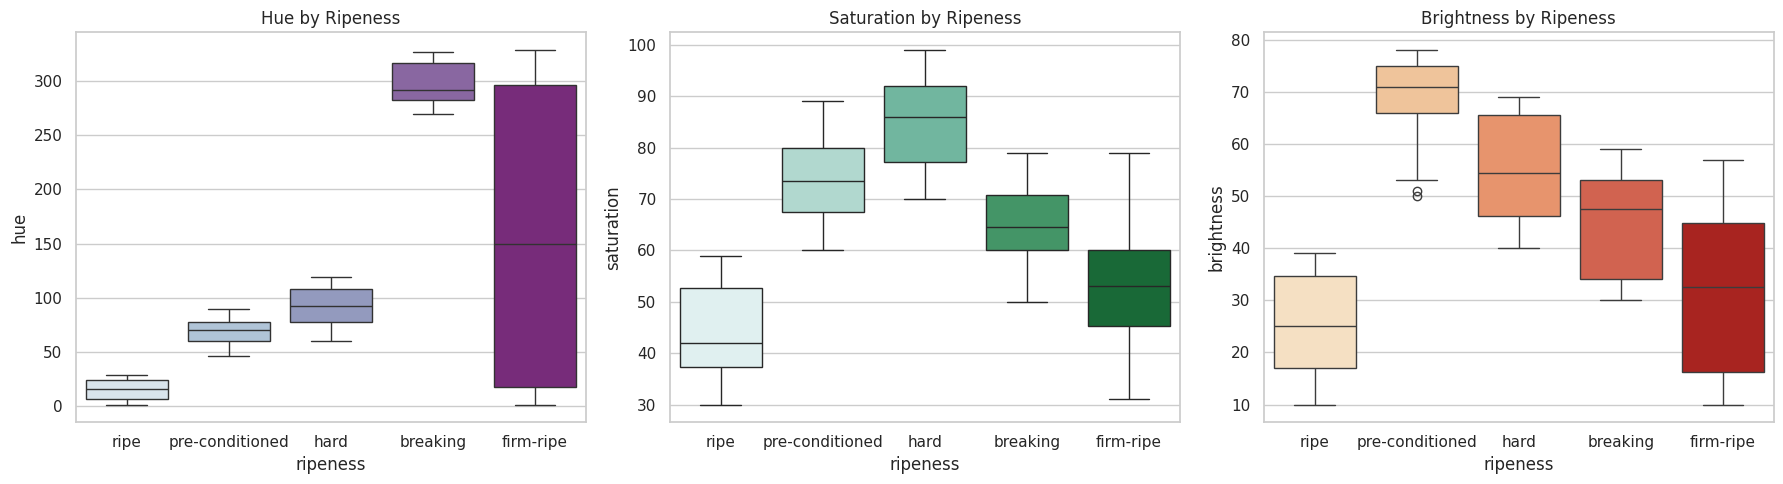

In [8]:
# 2. 🎨 Color metrics (hue, saturation, brightness) vs ripeness
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, x='ripeness', y='hue', ax=axes[0], palette='BuPu')
axes[0].set_title('Hue by Ripeness')
sns.boxplot(data=df, x='ripeness', y='saturation', ax=axes[1], palette='BuGn')
axes[1].set_title('Saturation by Ripeness')
sns.boxplot(data=df, x='ripeness', y='brightness', ax=axes[2], palette='OrRd')
axes[2].set_title('Brightness by Ripeness')
plt.tight_layout()
plt.show()

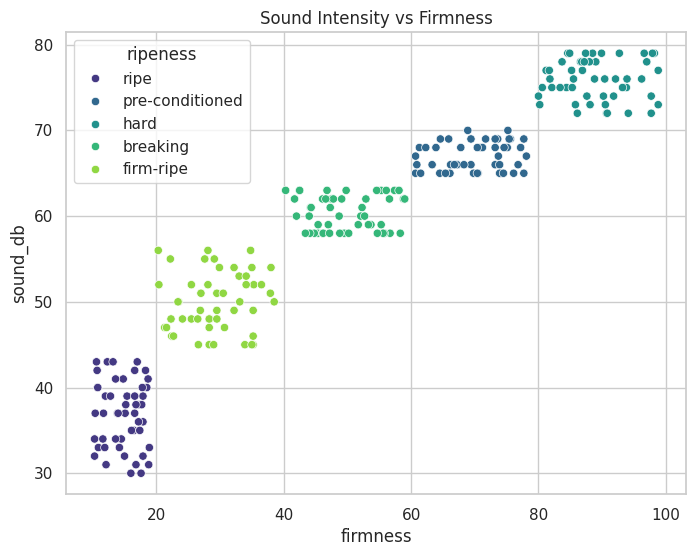

In [9]:
# 3. 📉 Sound_db vs Firmness Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='firmness', y='sound_db', hue='ripeness', palette='viridis')
plt.title("Sound Intensity vs Firmness")
plt.show()

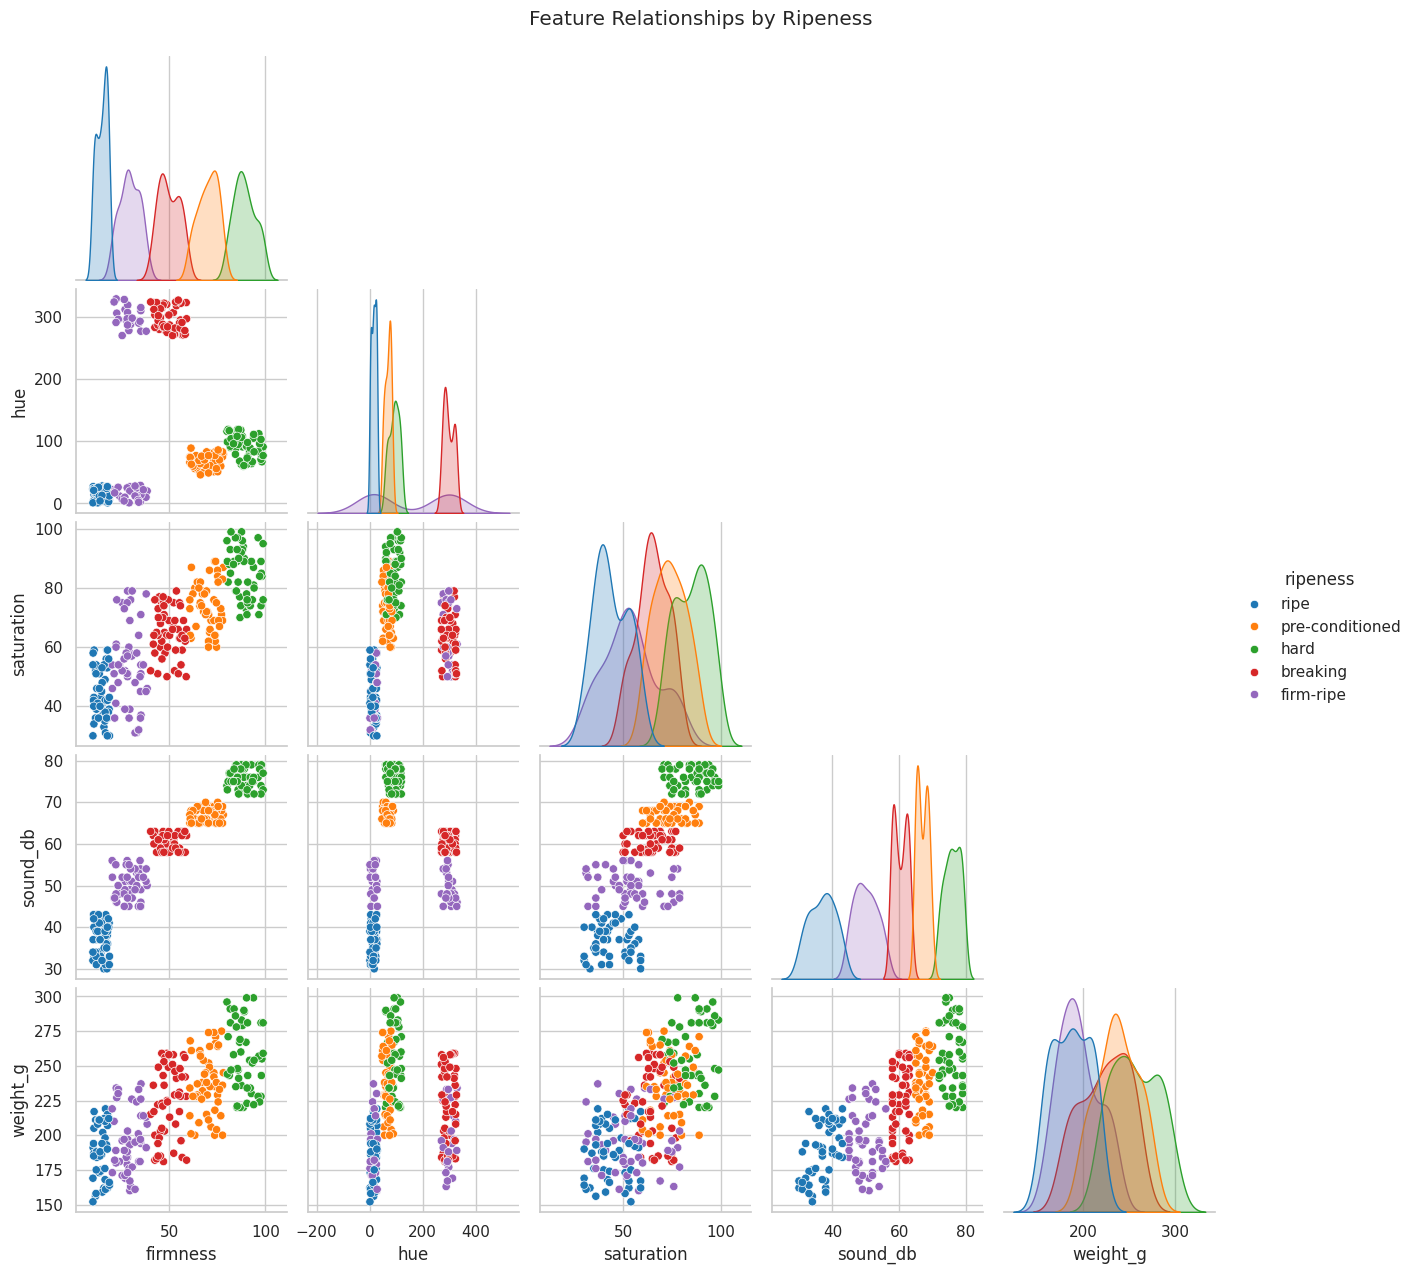

In [10]:
# 4. 📊 Visual Clustering Patterns (Pairplot)
pairplot_cols = ['firmness', 'hue', 'saturation', 'sound_db', 'weight_g']
sns.pairplot(df[pairplot_cols + ['ripeness']], hue='ripeness', corner=True, palette='tab10')
plt.suptitle("Feature Relationships by Ripeness", y=1.02)
plt.show()

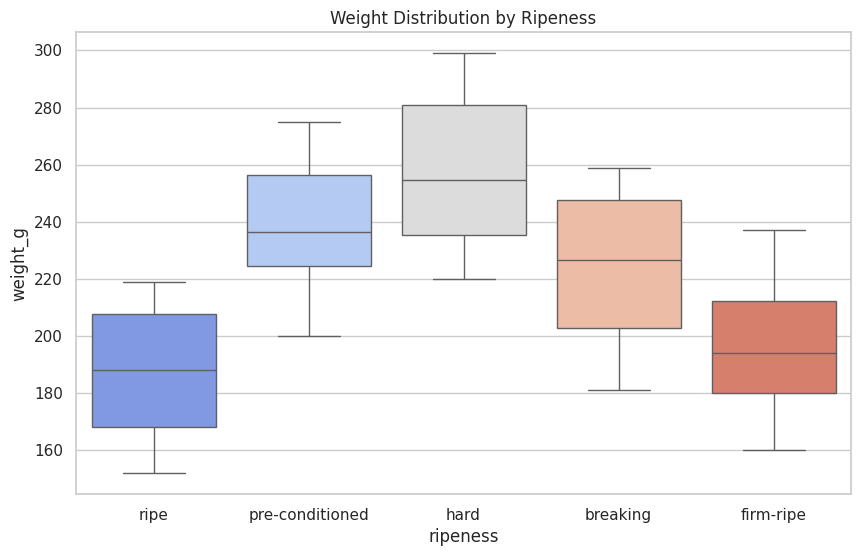

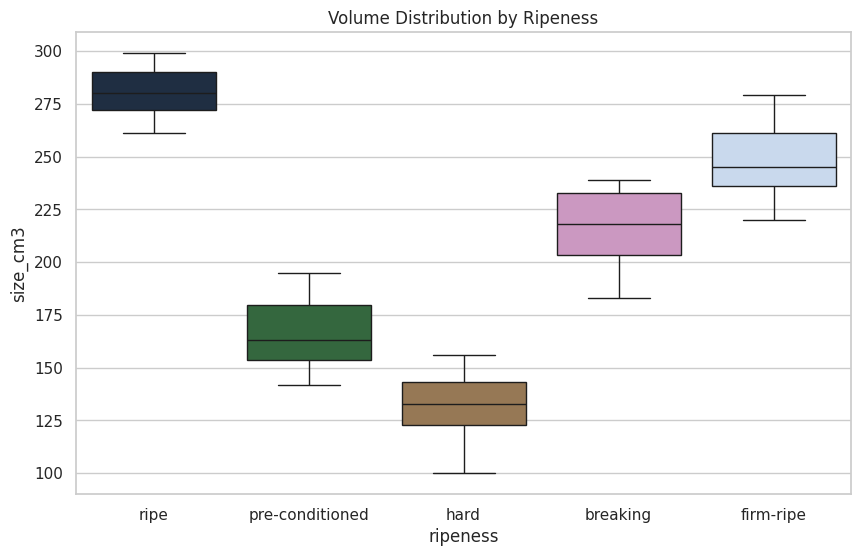

In [11]:
# 5. 📦 Weight and Volume Across Ripeness Stages
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ripeness', y='weight_g', palette='coolwarm')
plt.title("Weight Distribution by Ripeness")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ripeness', y='size_cm3', palette='cubehelix')
plt.title("Volume Distribution by Ripeness")
plt.show()

# ===============================
# 🔍 Feature Engineering
# ===============================

In [12]:
# Copy dataframe for feature engineering
df_fe = df.copy()

# 🟢 firmness_score: scaled measure of resistance (StandardScaler used previously)
scaler_firmness = StandardScaler()
df_fe['firmness_score'] = scaler_firmness.fit_transform(df_fe[['firmness']])

In [13]:
# 🌈 color_intensity: derived from saturation + brightness
df_fe['color_intensity'] = df_fe['saturation'] + df_fe['brightness']

# 🔊 sound_ratio: sound_db normalized by size (dB per cm³)
df_fe['sound_ratio'] = df_fe['sound_db'] / (df_fe['size_cm3'] + 1e-6)  # Avoid division by zero

# 📦 density: mass per volume (g/cm³)
df_fe['density'] = df_fe['weight_g'] / (df_fe['size_cm3'] + 1e-6)

# Optional: show new features
print(df_fe[['firmness_score', 'color_intensity', 'sound_ratio', 'density']].describe())

       firmness_score  color_intensity  sound_ratio     density
count    2.500000e+02       250.000000   250.000000  250.000000
mean     2.486900e-16       109.428000     0.320923    1.183738
std      1.002006e+00        33.464193     0.165455    0.510849
min     -1.481038e+00        42.000000     0.100671    0.537415
25%     -9.135047e-01        79.000000     0.189402    0.758929
50%     -6.128626e-02       117.000000     0.276862    1.057726
75%      8.607259e-01       137.750000     0.432684    1.536703
max      1.769881e+00       165.000000     0.782178    2.544554


# ===============================
# 🧠 Modeling Objectives: Classification Task
# ===============================


In [14]:
# Feature set & target
features = ['firmness_score', 'hue', 'saturation', 'brightness', 'color_intensity', 'sound_ratio', 'density']
X = df_fe[features]
y = df['ripeness_encoded']

🔍 Random Forest
✅ Accuracy: 100.00%
🎯 F1 Score: 100.00%
📊 Confusion Matrix:
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


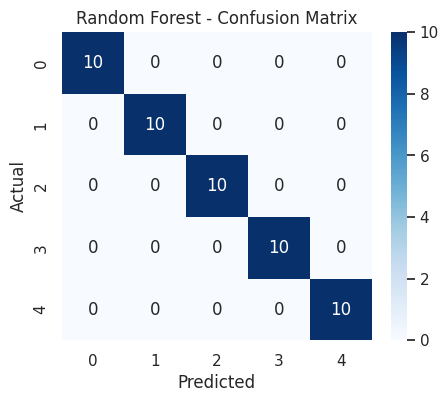

🔍 XGBoost
✅ Accuracy: 100.00%
🎯 F1 Score: 100.00%
📊 Confusion Matrix:
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


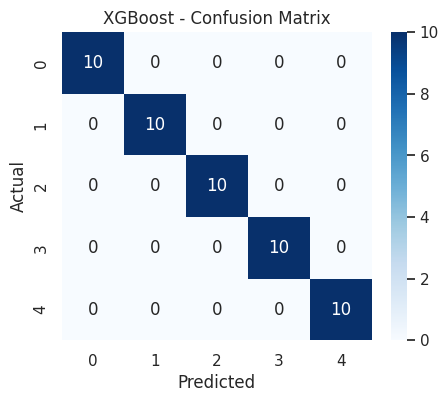

🔍 Logistic Regression
✅ Accuracy: 92.00%
🎯 F1 Score: 91.44%
📊 Confusion Matrix:
[[10  0  0  0  0]
 [ 1  6  0  0  3]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


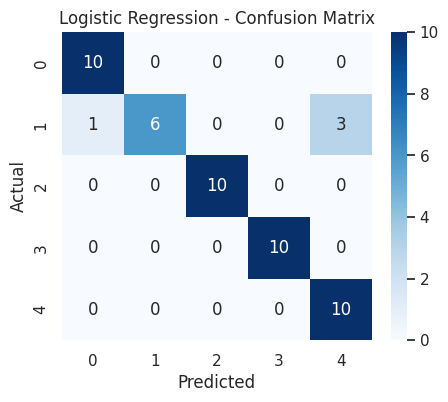


🔎 Top Features (Random Forest):
        Feature  Importance
 firmness_score    0.336973
    sound_ratio    0.310780
        density    0.107599
            hue    0.102146
color_intensity    0.071545
     brightness    0.042429
     saturation    0.028528


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"🔍 {name}")
    print(f"✅ Accuracy: {acc:.2%}")
    print(f"🎯 F1 Score: {f1:.2%}")
    print("📊 Confusion Matrix:")

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results[name] = model

# 🔎 Feature importance dari Random Forest
rf_model = results['Random Forest']
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print("\n🔎 Top Features (Random Forest):")
print(feat_imp_df.to_string(index=False))

# ===============================
# 📌 Interpretability Task
# ===============================

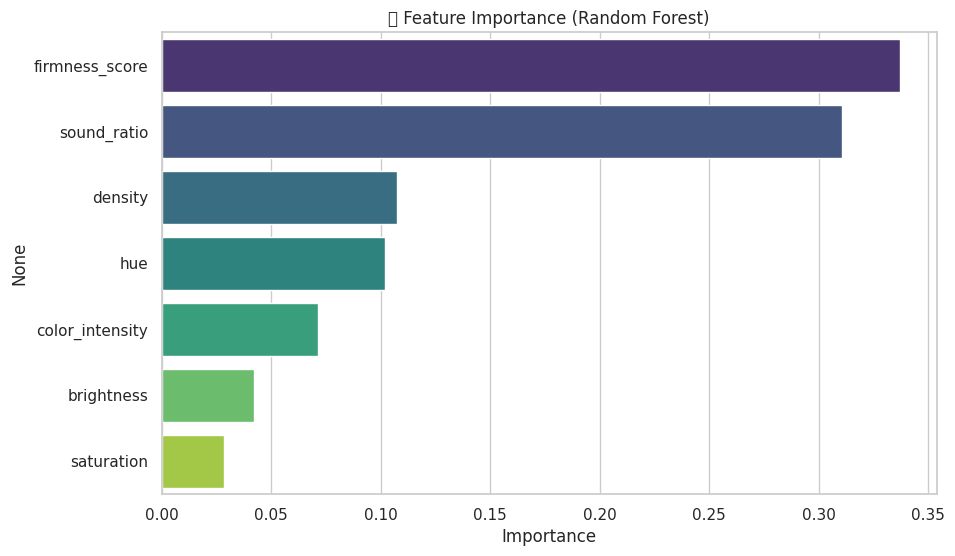

In [16]:
# Feature Importance from Random Forest
rf_model = results["Random Forest"]
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("🎯 Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

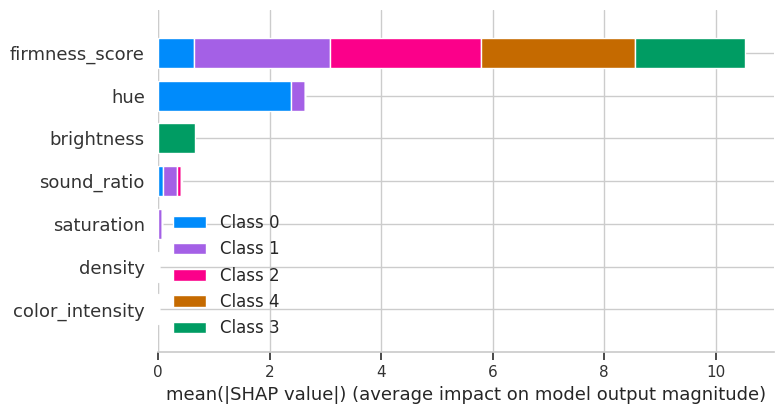

In [17]:
# SHAP interpretability for XGBoost
explainer = shap.Explainer(results["XGBoost"])
shap_values = explainer(X_test)

# Summary plot (SHAP)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [19]:
# Final features
features = ['firmness_score', 'hue', 'saturation', 'brightness', 'color_intensity', 'sound_ratio', 'density']
X = df_fe[features]
y = df['ripeness_encoded']

# Standardization (optional depending on the model, Logistic Regression requires it)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler for deployment
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [20]:
from sklearn.model_selection import cross_val_score

# using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
print(f"📈 Cross-validated accuracy: {scores.mean():.2%} ± {scores.std():.2%}")

📈 Cross-validated accuracy: 100.00% ± 0.00%


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1_weighted')
grid.fit(X_scaled, y)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best parameters: {'max_depth': None, 'n_estimators': 100}


In [22]:
joblib.dump(best_model, 'rf_model.pkl')

['rf_model.pkl']

In [23]:
# Simulation: Load model and scaler
loaded_model = joblib.load('rf_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Predict one sample data
sample = X.iloc[[0]]  # first row
sample_scaled = loaded_scaler.transform(sample)
pred = loaded_model.predict(sample_scaled)
print("Predicted class:", pred)

Predicted class: [4]


In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [26]:
!pip install streamlit pyngrok

In [27]:
%%writefile avocado_app.py
# Paste the Streamlit app script here

Writing avocado_app.py


In [28]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Page config
st.set_page_config(page_title="Avocado Ripeness Classifier", page_icon="🥑", layout="wide")

# Banner
st.markdown("""
    <h1 style='text-align: center; color: #228B22;'>🥑 Avocado Ripeness Classifier</h1>
    <p style='text-align: center;'>Predict the ripeness of avocados based on physical characteristics & sound</p>
""", unsafe_allow_html=True)

# Avocado Image (optional if you have a URL or local file)
st.image("https://cdn.pixabay.com/photo/2016/03/05/19/02/avocado-1238257_1280.jpg", width=300, caption="Ready to ripen!", use_container_width=True)

# Sidebar input
st.sidebar.header("🧪 Avocado Feature Input")

firmness = st.sidebar.slider("💪 Firmness Score", 0.0, 10.0, 5.0, help="Firmness score of the avocado (0 = very soft, 10 = very hard)")
hue = st.sidebar.slider("🌈 Hue", 0.0, 360.0, 120.0, help="Skin color (Hue color angle)")
saturation = st.sidebar.slider("🎨 Saturation", 0.0, 1.0, 0.5, help="Skin color saturation")
brightness = st.sidebar.slider("🔆 Brightness", 0.0, 1.0, 0.5, help="Fruit skin brightness")
color_intensity = st.sidebar.slider("🟢 Color Intensity", 0.0, 100.0, 50.0, help="Color intensity (combination of hue + saturation)")
sound_ratio = st.sidebar.slider("🔊 Sound Ratio", 0.0, 1.0, 0.5, help="Sound reflection when tapped")
density = st.sidebar.slider("⚖️ Density", 0.0, 2.0, 1.0, help="Fruit density")

# Predict button
if st.sidebar.button("🔍 Predict Ripeness"):
    input_data = np.array([[firmness, hue, saturation, brightness, color_intensity, sound_ratio, density]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]

    label_dict = {0: "🟢 Hard", 1: "🟡 Ripe", 2: "🔴 Overripe"}
    st.success(f"🍃 Prediction Result: **{label_dict[prediction]}**")
    st.balloons()
else:
    st.info("Enter features in the sidebar, then click '🔍 Predict Ripeness' to start.")

2025-05-23 08:27:52.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 08:27:52.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
from pyngrok import ngrok
!streamlit run avocado_app.py &

# Buka tunnel ke port 8501
public_url = ngrok.connect(port=8501)
print(f"🌍 App URL: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.227.72:8501

